### Example 3 - Correlations

### 2.1 What to do?
Next we will analyze the correlation between exemplary data from the TotalSegmentator training dataset. Therefore load the exemplary data (ex3.csv) containing the age, gender and some volume and attenuation data from the segmented TotalSegmentator training dataset. Now the goal is to calculate Pearson correlation and Spearman correlation for the given data.

The function statsmed.corr_two_gr(), allows you to correlate two input data. It requires as input the data (x and y, that you want to correlate) (please exclude NaN or None values) the number of decimals it should return (if not given assumes 2), the mode and the number of decimals for the p value (if not given assumes 3).
The output depends on mode:
- if mode = 'all' the function prints Spearman and Pearson correlation
- if mode = 'normal distribution' - Pearson correlation is given
- if mode = 'no normal distribution' - Spearman correlation is returned
- if something else is given the respective output depends on whether the data is normal distributed (Pearson correlation) or not normal distributed (Spearman correlation) due to statsmed.stdnorm_test()
- the output for each line of the output: 0 (Pearson) or 1 (Spearman); r-value rounded to number of given decimals; p-value rounded to number of decimals for significant p values; 95%-confidence interval of r-value rounded to number of given decimals
- the given lines depend on the mode

If applied to your own data please be careful with possible NaN or None values in your data.

In [1]:
import pandas
from statsmed import statsmed
data = pandas.read_csv('ex3.csv',delimiter=',',on_bad_lines='skip')


print(data)

statsmed.corr_two_gr(data['age'],data['aorta_volume'],2,'all')



      Unnamed: 0 sex  age  kidney_right_volume  kidney_left_volume   
0              0   M   79           203708.250          184464.000  \
1              1   M   71           191288.250          181892.250   
2              2   M   66           125469.000          116474.625   
3              3   F   74           131415.750          118827.000   
4              4   M   85                0.000               0.000   
...          ...  ..  ...                  ...                 ...   
1085        1085   F   64                0.000               0.000   
1086        1086   M   81           171065.226          183714.724   
1087        1087   M   86           167487.750          186030.000   
1088        1088   M   65           192024.000          136856.250   
1089        1089   M   67                0.000               0.000   

      pancreas_volume  hip_left_intensity  hip_right_intensity   
0           72383.625               0.000                0.000  \
1          103372.875      

array([[ 1.   ,  0.06 ,  0.055, -0.   ,  0.12 ],
       [ 0.   ,  0.12 ,  0.   ,  0.06 ,  0.17 ]])

Here we see that the exemplary data contains: sex, age, kidney_right_volume, kidney_left_volume, pancreas_volume, hip_left_intensity, hip_right_intensity, iliopsoas_left_volume, iliopsoas_right_volume, aorta_volume. Whereas Volumes are given in $mm^3$.

We tried to correlate the age with the volume of the aorta. The function returned that both variables are from the given data significant different distributed compared to a normal distribution. Also we retrieve low r-values so that there is a poor correlation (Akoglu H. User's guide to correlation coefficients. Turk J Emerg Med. 2018 Aug 7;18(3):91-93. doi: 10.1016/j.tjem.2018.08.001. PMID: 30191186; PMCID: PMC6107969). According to Akoglu H. User's guide to correlation coefficients - we have for Pearsons and Spearman correlations with the given r-values:

| r-value      | Interpretation (Chan YH (Medicine)) |
|--------------|-------------------------------------|
| +1.0         | Perfect                             |
| 0.8 - 1.0    | Very Strong                         |
| 0.6 - 0.8    | Moderate                         |
| 0.3 - 0.6    | Fair                         |
| 0.0 - 0.3    | Poor                         |
| 0.0    | None                         |
| -0.0 - -0.3    | Poor                         |
| -0.3 - -0.6    | Fair                         |
| -0.6 - -0.8    | Moderate                         |
| -0.8 - -1.0    | Very Strong                         |
| -1.0         | Perfect                             |

Let us have a show look at the data. As you might have already seen a lot of volumes of the aorta are zero, because the respective scan of the trainings dataset did not include this structure. Therefore we want to exclude these data. So let us use 10 ml as a lower cut-off. Moreover we want to report the volume in ml and $1 ml = 1000 mm^3$, so we need to divide the current value by 1000.

In [6]:
new_data = data[['age','aorta_volume']][data['aorta_volume'] >= 10]
statsmed.corr_two_gr(new_data['age'],new_data['aorta_volume']/1000,2,'all',4)

Testing normal distribution of first variable:
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: Normal dsitribution (p-value = 0.21 
 	 - p-value >= 0.05 indicates no significant difference from normal distribution)
At least one test indicates no normal distribution
Testing normal distribution of second variable:
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: No normal dsitribution (p-value = 0.0036)
At least one test indicates no normal distribution
The Spearman correlation yields a r-value of: r = 0.41 (p < 0.0001)
The Spearman correlation with 95%-confidence interval is: r = 0.41 (CI: 0.31 - 0.50; p < 0.0001)
The Pearson correlation yields a r-value of: r = 0.35 (p < 0.0001)
The Pearson correlation with 95%-confidence interval is: r = 0.35 (CI: 0.25 - 0.44; p < 0.0001)


array([[1.  , 0.41, 0.  , 0.31, 0.5 ],
       [0.  , 0.35, 0.  , 0.25, 0.44]])

Now we receive a significant fair correlation with r-values above 0.3 especially for the Spearman correlation as our data is significant not normal distributed. So let us make plots of these.

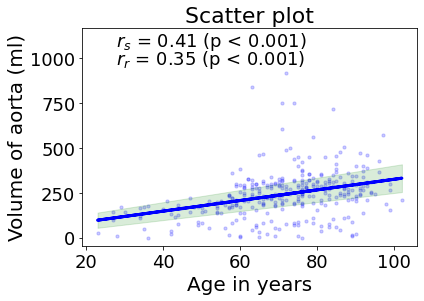

In [7]:
import matplotlib.pyplot as plt
statsmed.corr_scatter_figure(new_data['age'],new_data['aorta_volume']/1000,plt.gca(),'Scatter plot','Age in years','Volume of aorta (ml)',color = 'blue',mode='all')

This plot is a scatter plot of all input x and y data. It also gives a linear regression of the data for visualization with confidence interval. In the plot the respective correlation coefficients are given. Let us do this with multiple subplots:

Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: Normal dsitribution (p-value = 0.21 
 	 - p-value >= 0.05 indicates no significant difference from normal distribution)
At least one test indicates no normal distribution
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: No normal dsitribution (p-value = 0.0036)
At least one test indicates no normal distribution
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: No normal dsitribution (p-value = 0.0172)
At least one test indicates no normal distribution
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: No normal dsitribution (p-value = 0.0480)
At least one test indicates no normal distribution
Shapiro-Wilk: No normal dsitribution (p-value = 0.0000)
Kolmogorow-Smirnow: No normal dsitribution (p-value = 0.0253)
At least one test indicates no normal distribution
Shapiro-Wilk: No normal dsitribution (p-value = 0.0099)
Kolmogorow-Smirnow: N

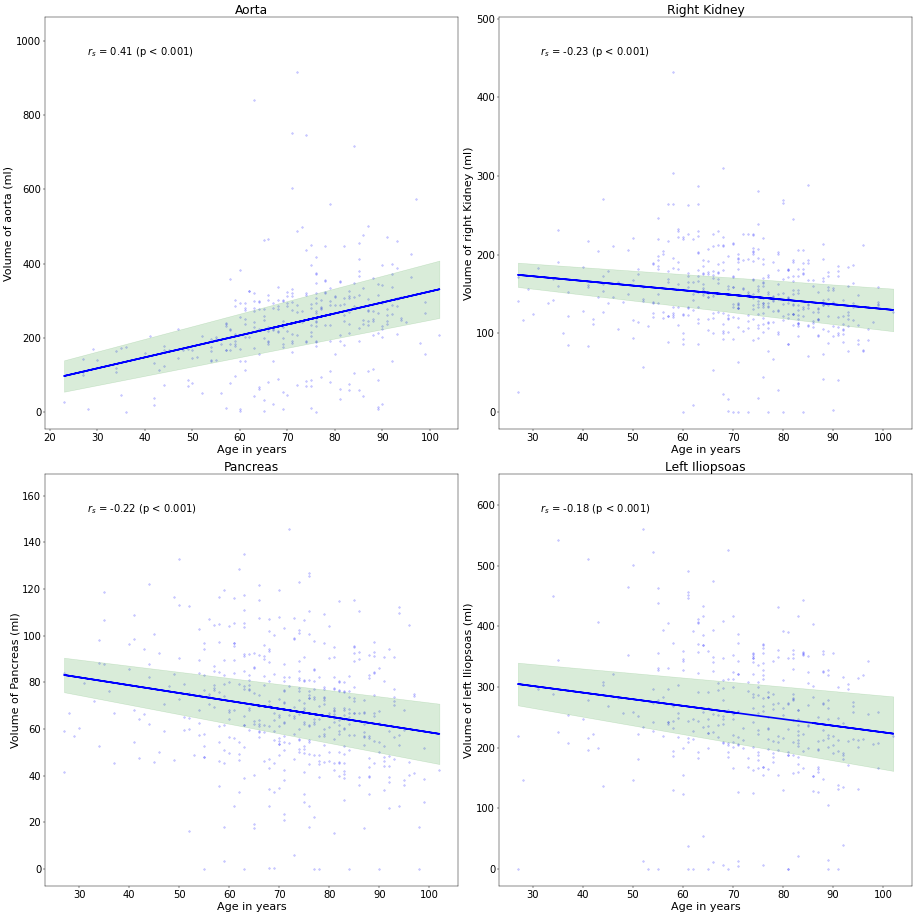

In [9]:
fig=plt.figure(figsize=(23, 23),dpi=40)
x1=fig.add_subplot(2,2,1) 
statsmed.corr_scatter_figure(new_data['age'],new_data['aorta_volume']/1000,x1,'Aorta','Age in years','Volume of aorta (ml)',color = 'blue')
x2=fig.add_subplot(2,2,2)
statsmed.corr_scatter_figure(data['age'][data['kidney_right_volume'] >= 10],data['kidney_right_volume'][data['kidney_right_volume'] >= 10]/1000,x2,'Right Kidney','Age in years','Volume of right Kidney (ml)',color = 'blue')
x3=fig.add_subplot(2,2,3)
statsmed.corr_scatter_figure(data['age'][data['pancreas_volume'] >= 10],data['pancreas_volume'][data['pancreas_volume'] >= 10]/1000,x3,'Pancreas','Age in years','Volume of Pancreas (ml)',color = 'blue')
x4=fig.add_subplot(2,2,4)
statsmed.corr_scatter_figure(data['age'][data['iliopsoas_left_volume'] >= 10],data['iliopsoas_left_volume'][data['iliopsoas_left_volume'] >= 10]/1000,x4,'Left Iliopsoas','Age in years','Volume of left Iliopsoas (ml)',color = 'blue')
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('Corr_subplots.tiff',transparent=False) # saves the figure


### 2.2 What to write?

In the statistical analysis section of a manuscript you may write:

"Correlations were assessed using Spearman’s rank correlation." or "Correlations were assessed using Pearsons's correlation." depending on what you used.

Alternatively you may write: "Depending on normal distribution correlation were assessed using Spearman’s rank correlation indicated by $r_s$ or Pearson's correlation indicated by $r_r$"

In the results section of the manuscript you can now give the respective r-values.

